# Introduction
The Nobel Prizes are awards issued for individuals who have made landmark contributions in the field of physics, chemistry, medicine, literature, peace and, later added, economics. These awards are issued each year by committee decision. The awards hold some interesting information such as the ratio of women to men who have received the award as well as organisations (awarded only for the peace prize). Moreover in recent years, the winners have become more diverse and include people from around the globe. 

Consequently, this project will aim to explore the following questions: 
* Ratio of female to male winners
* The countries with the highest number of awards. 
* Average age of the winners 

In [1]:
#import library 
from IPython.display import HTML

#inbed video
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/94YQ3el6LMc" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

/opt/conda/lib/python3.7/site-packages/IPython/core/display.py:724: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


# Overview
Before the data can be evaluated, the data and any issues need to be examined. For instance, some column names require renaming to improve readability (i.e. from "bornCountry" to "Country_of_birth".)

In [2]:
# import libraries
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# import data
import os
df = pd.read_csv("/kaggle/input/a-complete-history-of-nobel-prize-winners/nobel_prize_by_winner.csv", index_col = "index")

# view dataset
df.head()

,id,firstname,surname,born,died,bornCountry,bornCountryCode,bornCity,diedCountry,diedCountryCode,diedCity,gender,year,category,overallMotivation,share,motivation,name,city,country
index,,,,,,,,,,,,,,,,,,,,
0,846,Elinor,Ostrom,8/7/1933,6/12/2012,USA,US,"Los Angeles, CA",USA,US,"Bloomington, IN",female,2009.0,economics,NaN,2.0,"""for her analysis of economic governance, espe...",Indiana University,"Bloomington, IN",USA
1,846,Elinor,Ostrom,8/7/1933,6/12/2012,USA,US,"Los Angeles, CA",USA,US,"Bloomington, IN",female,2009.0,economics,NaN,2.0,"""for her analysis of economic governance, espe...",Arizona State University,"Tempe, AZ",USA
2,783,Wangari Muta,Maathai,4/1/1940,9/25/2011,Kenya,KE,Nyeri,Kenya,KE,Nairobi,female,2004.0,peace,NaN,1.0,"""for her contribution to sustainable developme...",NaN,NaN,NaN
3,230,Dorothy Crowfoot,Hodgkin,5/12/1910,7/29/1994,Egypt,EG,Cairo,United Kingdom,GB,Shipston-on-Stour,female,1964.0,chemistry,NaN,1.0,"""for her determinations by X-ray techniques of...","University of Oxford, Royal Society",Oxford,United Kingdom
4,918,Youyou,Tu,12/30/1930,0000-00-00,China,CN,Zhejiang Ningbo,NaN,NaN,NaN,female,2015.0,medicine,NaN,2.0,"""for her discoveries concerning a novel therap...",China Academy of Traditional Chinese Medicine,Beijing,China


In [3]:
# rename columns
df.rename(columns = {"name": "University", "born": "date_of_birth", 
                     "died": "date_of_death",
                     "bornCountry": "Country_of_birth", 
                     "bornCountryCode": "Country_code_of_birth", 
                    "bornCity": "City_of_birth", 
                    "diedCountry": "Country_of_death",
                    "diedCountryCode": "Country_code_of_death",
                    "diedCity": "City_of_death"}, inplace = True)

This dataset, consists of over 972 entries of Nobel prize winners. The approx. 16 columns pertaining to these individuals include their names, place of birth and the category under which they won the prize. There is additional coding required to ensure that the date columns are correctly formatted. 

In [4]:
# shape of dataframe
df.shape

(972, 20)

In [5]:
# information on dataframe 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 972 entries, 0 to 971
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     972 non-null    int64  
 1   firstname              966 non-null    object 
 2   surname                936 non-null    object 
 3   date_of_birth          946 non-null    object 
 4   date_of_death          946 non-null    object 
 5   Country_of_birth       940 non-null    object 
 6   Country_code_of_birth  940 non-null    object 
 7   City_of_birth          938 non-null    object 
 8   Country_of_death       601 non-null    object 
 9   Country_code_of_death  600 non-null    object 
 10  City_of_death          595 non-null    object 
 11  gender                 972 non-null    object 
 12  year                   966 non-null    float64
 13  category               966 non-null    object 
 14  overallMotivation      16 non-null     object 
 15  share 

In [6]:
# change formate of columns 
df["date_of_birth"] = pd.to_datetime(df["date_of_birth"], errors='coerce')
df["date_of_death"] = pd.to_datetime(df["date_of_death"], errors='coerce')

df["year"] = df["year"].fillna(0).astype(int)

However, an overview highlights that there may be a high number of missing values in some columns, as per the below graph. The overall motivation in particular has an excessive number of missing values. As such, drawing assumptions from this column will be dropped. 

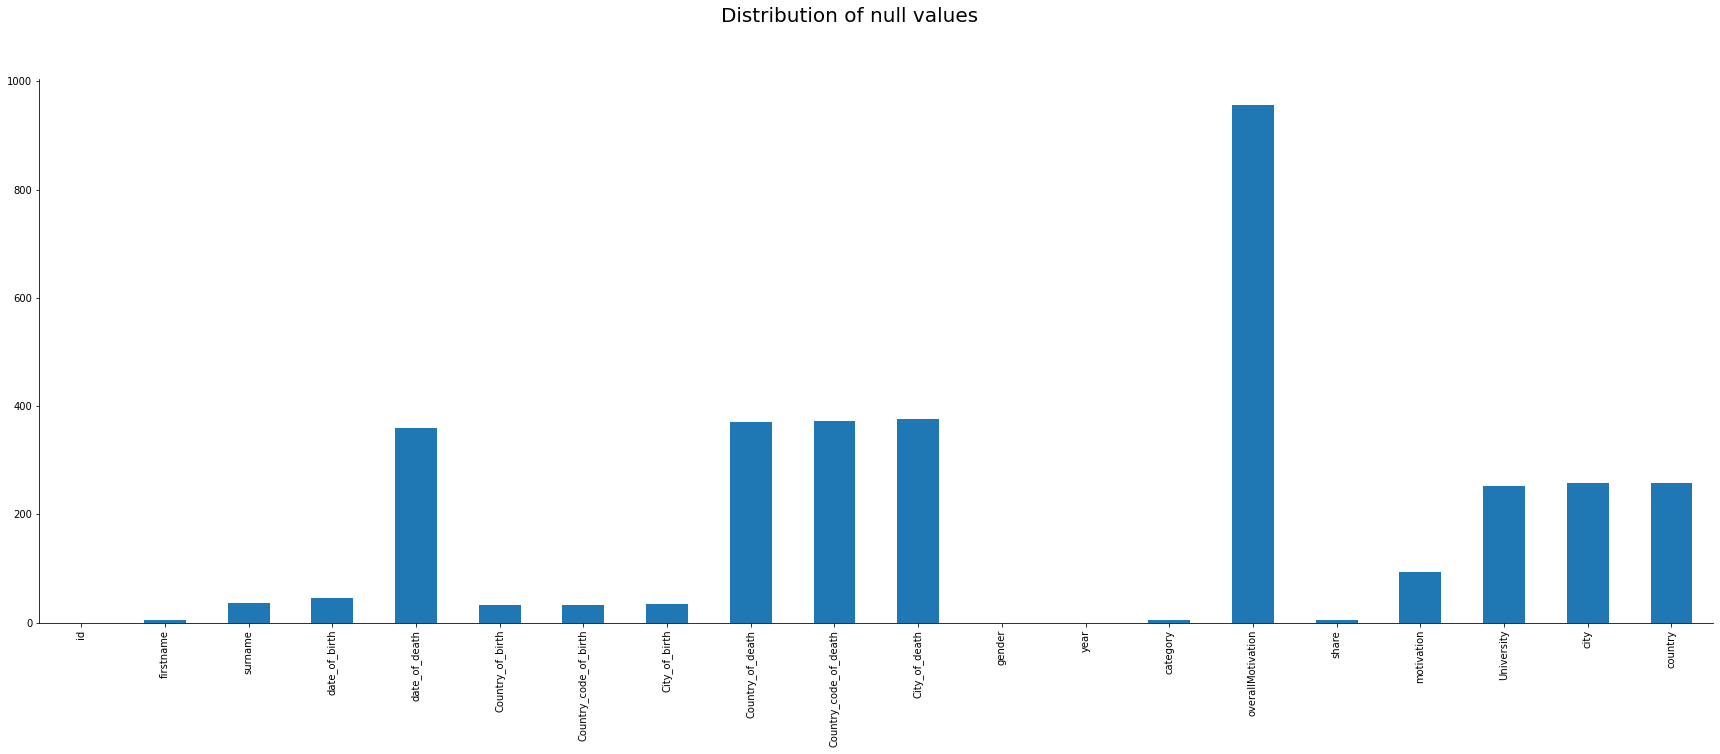

In [7]:
# graph of null values 

df.isnull().sum().plot(kind = "bar", figsize = (30,10))
sns.despine(top = True, right = True, left = False, bottom = False)
plt.suptitle("Distribution of null values", fontsize = 20)
plt.show()

In [8]:
# drop column 
df = df[[#'id',
        'firstname', 'surname', 'date_of_birth', 'date_of_death',
       'Country_of_birth', 'Country_code_of_birth', 'City_of_birth',
       'Country_of_death', 'Country_code_of_death', 'City_of_death', 'gender',
       'year', 'category', 
    #'overallMotivation', 
    'share', 'motivation',
       'University', 'city', 'country']].copy()

For the remaining columns, there is approx. 39% of missing values. This includes information about the name of the winner. Looking at the entries where both the first and surname is missing, highlights that information is missing for all other fields. As such these entries can be removed without undermining the quality of the dataset. Revise dataset consists of 936 entries, though there still appears to be a handful of null values in fields such as died country. 

In [9]:
# max % of null values 
(df.isnull().sum().max()/df.shape[0])*100

38.78600823045267

The dataset at this stage includes no duplicated values covering all fields. However, fields such as names indicate that there are duplicated values. Examining the list of names duplicated, it appears that there are two groups of individuals. Those that received multiple awards and those for whom information has been listed incorrectly. To separate these groups, the duplicated names and category can be singled out. This gives us 60 entries where the information appears to be duplicated. To urge on the side of caution, these values will be dropped. 

In [10]:
# rate of null values 
df.isnull().sum()

firstname                  6
surname                   36
date_of_birth             45
date_of_death            360
Country_of_birth          32
Country_code_of_birth     32
City_of_birth             34
Country_of_death         371
Country_code_of_death    372
City_of_death            377
gender                     0
year                       0
category                   6
share                      6
motivation                94
University               252
city                     258
country                  258
dtype: int64

In [11]:
df = df.dropna(subset = ["firstname", "surname"], thresh = 2).copy()

In [12]:
# new shape of dataframe 
df.shape

(936, 18)

In [13]:
# remaining null values 
df.isnull().sum()

firstname                  0
surname                    0
date_of_birth             13
date_of_death            326
Country_of_birth           0
Country_code_of_birth      0
City_of_birth              2
Country_of_death         337
Country_code_of_death    338
City_of_death            343
gender                     0
year                       0
category                   0
share                      0
motivation                69
University               216
city                     222
country                  222
dtype: int64

In [14]:
# duplicated values
df.loc[df.duplicated(subset =["firstname","surname" ])].head()

,firstname,surname,date_of_birth,date_of_death,Country_of_birth,Country_code_of_birth,City_of_birth,Country_of_death,Country_code_of_death,City_of_death,gender,year,category,share,motivation,University,city,country
index,,,,,,,,,,,,,,,,,,
1,Elinor,Ostrom,1933-08-07,2012-06-12,USA,US,"Los Angeles, CA",USA,US,"Bloomington, IN",female,2009,economics,2.0,"""for her analysis of economic governance, espe...",Arizona State University,"Tempe, AZ",USA
35,Marie,"Curie, n_e Sklodowska",1867-11-07,1934-07-04,Russian Empire (now Poland),PL,Warsaw,France,FR,Sallanches,female,1903,physics,4.0,"""in recognition of the extraordinary services ...",NaN,NaN,NaN
71,Claude,Cohen-Tannoudji,1933-04-01,NaT,French Algeria (now Algeria),DZ,Constantine,NaN,NaN,NaN,male,1997,physics,3.0,"""for development of methods to cool and trap a...",cole Normale Sup_rieure,Paris,France
84,David J.,Wineland,1944-02-24,NaT,USA,US,"Milwaukee, WI",NaN,NaN,NaN,male,2012,physics,2.0,"""for ground-breaking experimental methods that...",University of Colorado,"Boulder, CO",USA
86,Serge,Haroche,1944-09-11,NaT,Morocco,MA,Casablanca,NaN,NaN,NaN,male,2012,physics,2.0,"""for ground-breaking experimental methods that...",cole Normale Sup_rieure,Paris,France


In [15]:
# enteries for Curie, n_e Sklodowska
df.query('surname == "Curie, n_e Sklodowska"')

,firstname,surname,date_of_birth,date_of_death,Country_of_birth,Country_code_of_birth,City_of_birth,Country_of_death,Country_code_of_death,City_of_death,gender,year,category,share,motivation,University,city,country
index,,,,,,,,,,,,,,,,,,
33,Marie,"Curie, n_e Sklodowska",1867-11-07,1934-07-04,Russian Empire (now Poland),PL,Warsaw,France,FR,Sallanches,female,1911,chemistry,1.0,"""in recognition of her services to the advance...",Sorbonne University,Paris,France
35,Marie,"Curie, n_e Sklodowska",1867-11-07,1934-07-04,Russian Empire (now Poland),PL,Warsaw,France,FR,Sallanches,female,1903,physics,4.0,"""in recognition of the extraordinary services ...",NaN,NaN,NaN


In [16]:
# enteries for Cohen-Tannoudji
df.query('surname == "Cohen-Tannoudji"')

,firstname,surname,date_of_birth,date_of_death,Country_of_birth,Country_code_of_birth,City_of_birth,Country_of_death,Country_code_of_death,City_of_death,gender,year,category,share,motivation,University,city,country
index,,,,,,,,,,,,,,,,,,
70,Claude,Cohen-Tannoudji,1933-04-01,NaT,French Algeria (now Algeria),DZ,Constantine,NaN,NaN,NaN,male,1997,physics,3.0,"""for development of methods to cool and trap a...",Collge de France,Paris,France
71,Claude,Cohen-Tannoudji,1933-04-01,NaT,French Algeria (now Algeria),DZ,Constantine,NaN,NaN,NaN,male,1997,physics,3.0,"""for development of methods to cool and trap a...",cole Normale Sup_rieure,Paris,France


In [17]:
# shape of duplicated firstname, surname and category.
df.loc[df.duplicated(subset =["firstname","surname", "category"])].shape

(60, 18)

In [18]:
# duplicated rows
df.loc[df.duplicated(subset =["firstname","surname", "category"])].head()

,firstname,surname,date_of_birth,date_of_death,Country_of_birth,Country_code_of_birth,City_of_birth,Country_of_death,Country_code_of_death,City_of_death,gender,year,category,share,motivation,University,city,country
index,,,,,,,,,,,,,,,,,,
1,Elinor,Ostrom,1933-08-07,2012-06-12,USA,US,"Los Angeles, CA",USA,US,"Bloomington, IN",female,2009,economics,2.0,"""for her analysis of economic governance, espe...",Arizona State University,"Tempe, AZ",USA
71,Claude,Cohen-Tannoudji,1933-04-01,NaT,French Algeria (now Algeria),DZ,Constantine,NaN,NaN,NaN,male,1997,physics,3.0,"""for development of methods to cool and trap a...",cole Normale Sup_rieure,Paris,France
84,David J.,Wineland,1944-02-24,NaT,USA,US,"Milwaukee, WI",NaN,NaN,NaN,male,2012,physics,2.0,"""for ground-breaking experimental methods that...",University of Colorado,"Boulder, CO",USA
86,Serge,Haroche,1944-09-11,NaT,Morocco,MA,Casablanca,NaN,NaN,NaN,male,2012,physics,2.0,"""for ground-breaking experimental methods that...",cole Normale Sup_rieure,Paris,France
88,Charles Kuen,Kao,1933-11-04,NaT,China,CN,Shanghai,NaN,NaN,NaN,male,2009,physics,2.0,"""for groundbreaking achievements concerning th...",Chinese University of Hong Kong,Hong Kong,China


In [19]:
# drop duplicates
df = df.loc[~df.duplicated(subset =["firstname","surname", "category"])].reset_index(drop = True).copy()

In [20]:
# revised dataframe 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 876 entries, 0 to 875
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   firstname              876 non-null    object        
 1   surname                876 non-null    object        
 2   date_of_birth          864 non-null    datetime64[ns]
 3   date_of_death          584 non-null    datetime64[ns]
 4   Country_of_birth       876 non-null    object        
 5   Country_code_of_birth  876 non-null    object        
 6   City_of_birth          874 non-null    object        
 7   Country_of_death       574 non-null    object        
 8   Country_code_of_death  573 non-null    object        
 9   City_of_death          568 non-null    object        
 10  gender                 876 non-null    object        
 11  year                   876 non-null    int64         
 12  category               876 non-null    object        
 13  share

# Gender Ratio
Overall, men dominate the awards significantly.

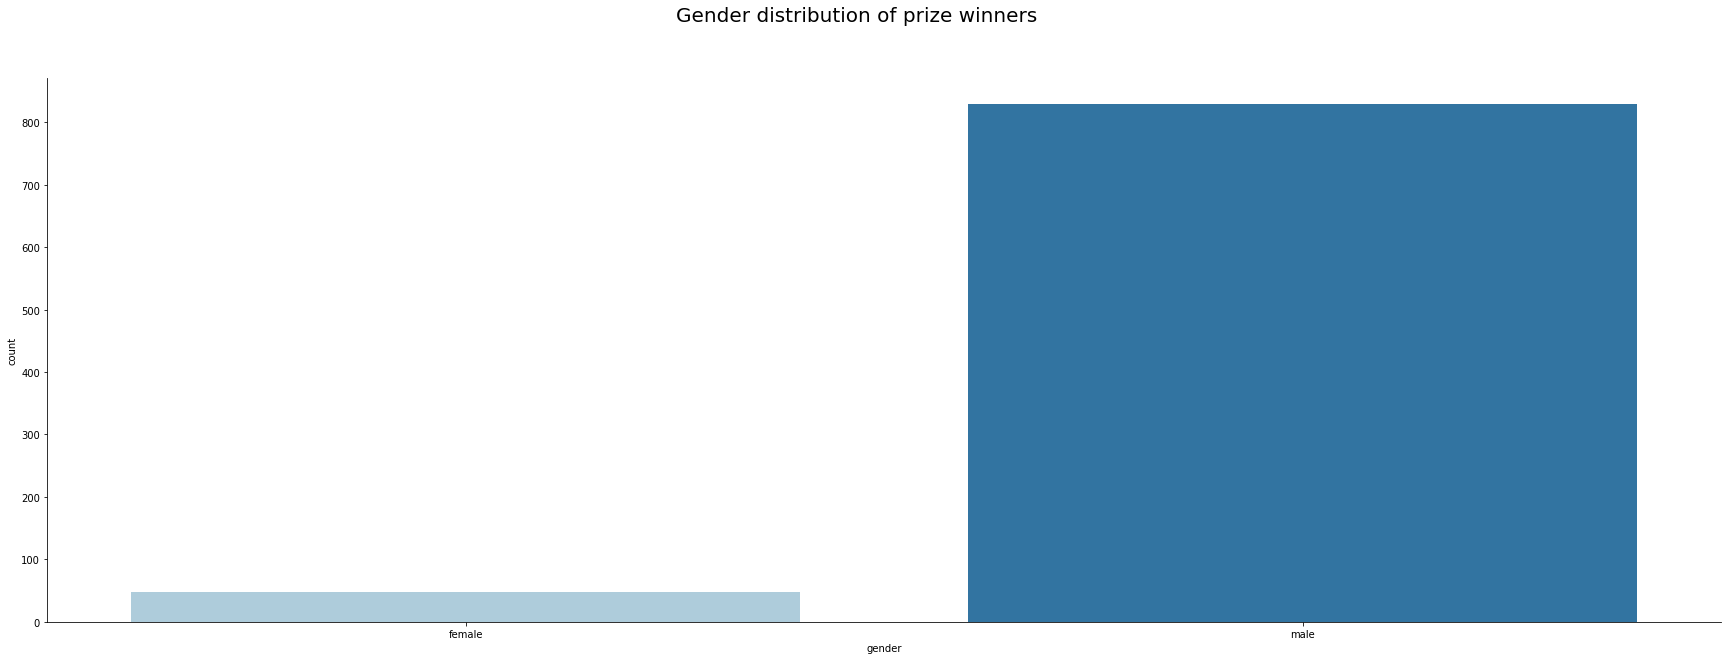

In [21]:
# draw graph

plt.figure(figsize= (30,10))
sns.countplot(x = "gender", data = df, palette = "Paired", )
plt.suptitle("Gender distribution of prize winners", fontsize = 20)

sns.despine(top = True, right = True, left = False, bottom = False)
plt.show()

Also looking deeper at the categories,  this pattern remains but the imbalance appears to be greater in some categories than others. For example, physics is extremely dominated by men, as is economics. Pease, medicine and literature do, on the other hand,  perform better, relative to other categories, with more female winners. 

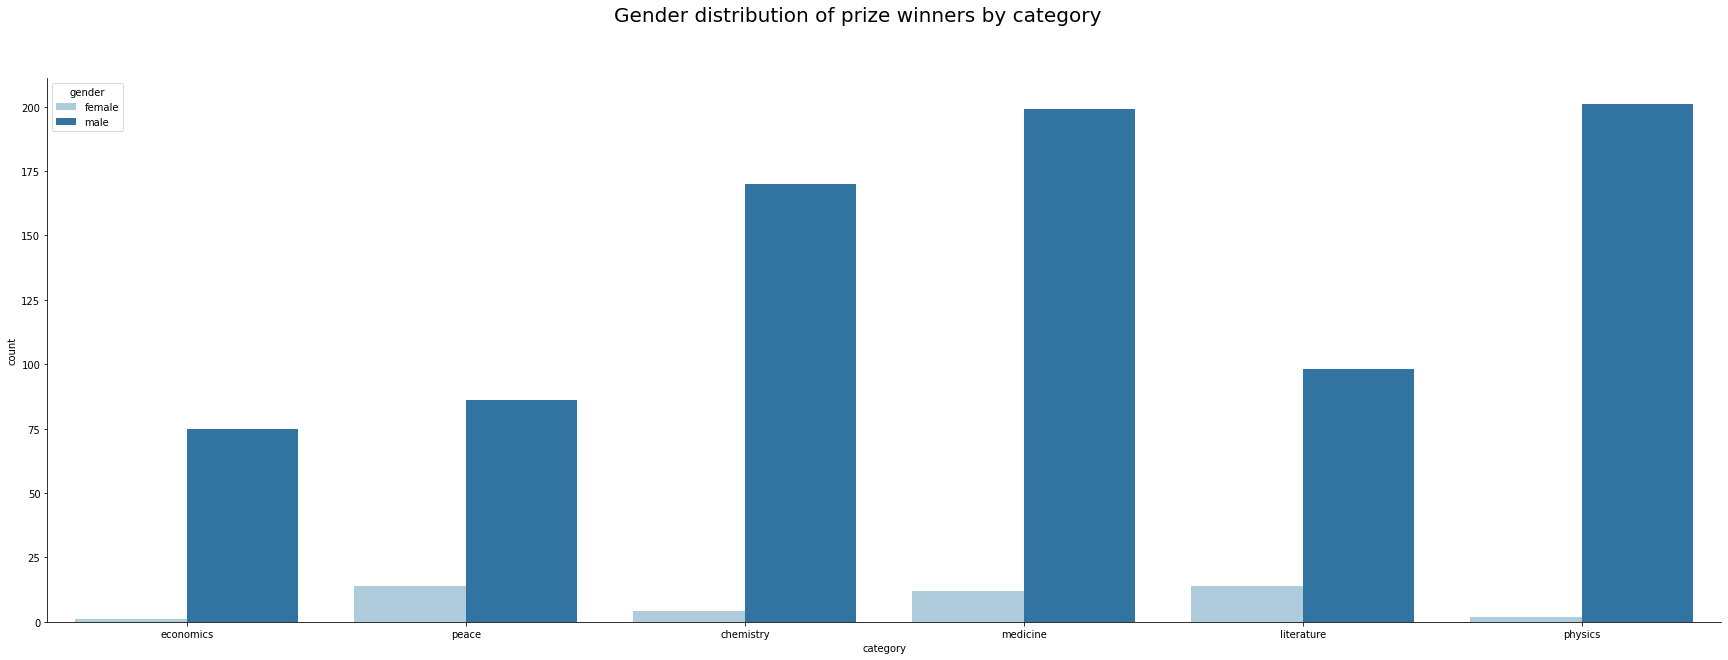

In [22]:
# draw graph
plt.figure(figsize= (30,10))
sns.countplot(x = "category", data = df, hue ="gender", palette = "Paired",  )
plt.suptitle("Gender distribution of prize winners by category", fontsize = 20)

sns.despine(top = True, right = True, left = False, bottom = False)

plt.show()

Examining how the gender ratio has transformed post 2000s and pre 1950s, indicate that the gender balance may have not improved in recent years. Since the 2000s there have been no female winners whilst pre 1950s there were some. Economics were introduced post 1950s and it too is dominated by men. 

However the gender balance in areas such as peace and literature appear to have improved greatly. Medicine is also performing better in recent years.

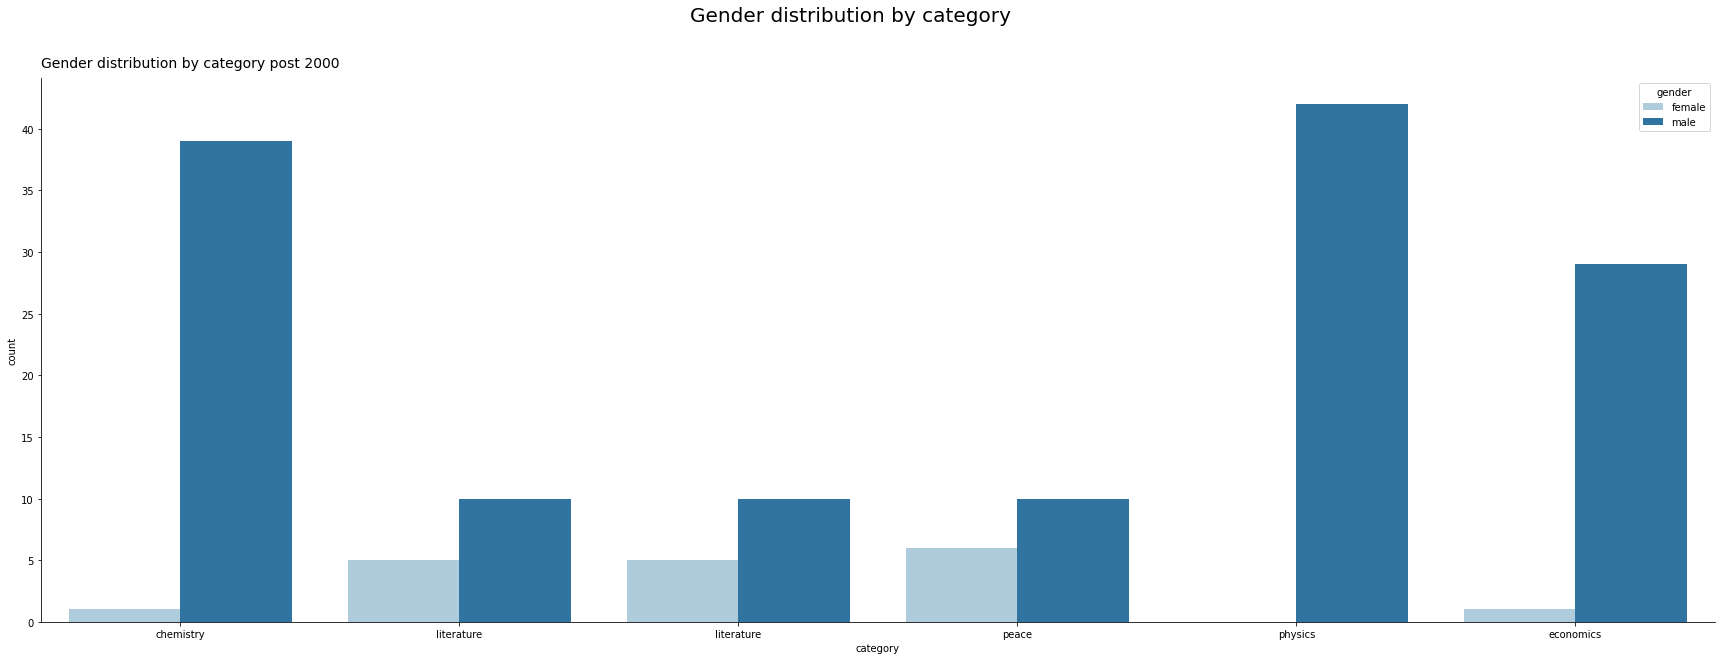

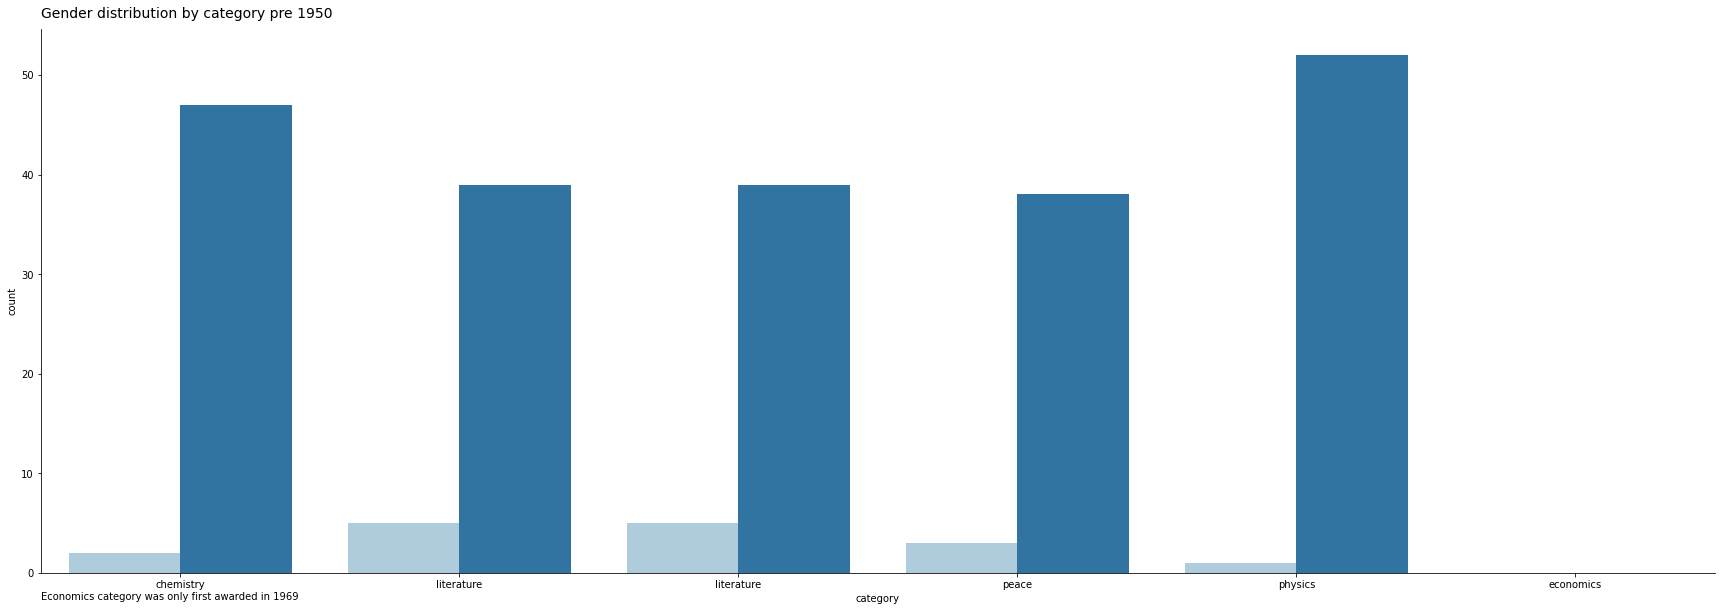

In [23]:
# create subset of data
post_00s = df.query('year >2000')
pre_50s = df.query('year <1950')

# draw graph
plt.figure(figsize= (30,10))
plt.legend(loc="upper center" )
sns.countplot(x = "category", data = post_00s, hue ="gender", palette = "Paired", order = ["chemistry","literature", "literature", "peace", "physics", "economics" ] )
plt.suptitle("Gender distribution by category", fontsize = 20)
plt.title("Gender distribution by category post 2000", loc='left',fontsize = 14, y = 1.01)
sns.despine(top = True, right = True, left = False, bottom = False)



plt.figure(figsize= (30,10))
sns.countplot(x = "category", data = pre_50s, hue ="gender" , palette = "Paired", order = ["chemistry","literature", "literature", "peace", "physics", "economics" ] )
plt.title("Gender distribution by category pre 1950", fontsize = 14, loc='left', y = 1.01)
plt.annotate('Economics category was only first awarded in 1969', (0,-.05),  xycoords ='axes fraction' )
sns.despine(top = True, right = True, left = False, bottom = False)
plt.legend().set_visible(False)
plt.show()

As multiple parties can win an award at any one time, the swarm plot is used to highlight how the female winners lie in the greater scheme of the dataset. This indicates how for some categories female winners have increased, peace and medicine. For others especially physics is very male focused. 

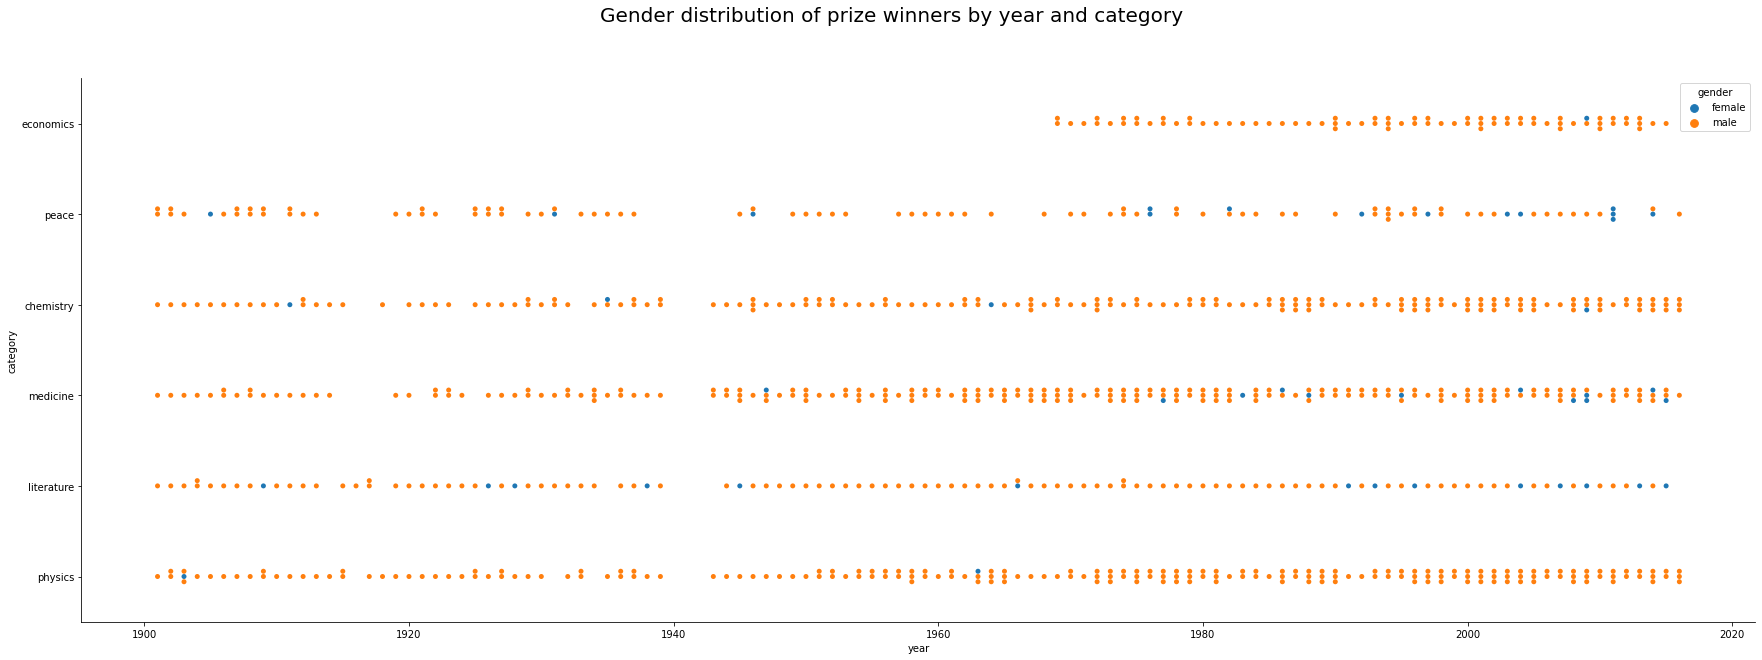

In [24]:
# draw graph

plt.figure(figsize= (30,10))
sns.swarmplot(y ="category", x = "year", data = df, hue = "gender",)
plt.suptitle("Gender distribution of prize winners by year and category", fontsize = 20)

sns.despine(top = True, right = True, left = False, bottom = False)


plt.show()

Diversity is affected by a plethora of social factors. For instance, the perception of the subject area which discourages females from entering a specific field. this has been a long running issue for stem subjects which includes physics and chemistry. Alas this is not a simple issue the committees behind the prize can rectify. 

Furthermore, to be awarded a prize, individuals must be nominated. Gender biases may have an impact if parties consider the Nobel prize to be a male centric award and thus fail to nominate leading female figures. 

In the worse cases, ideas by females may have been developed by males, whilst excluding the females, leading to the awards being given to the males. Whilst this may seem unlikely or even harsh, it should be noted that in the UK women have only had the [right to vote since 1928  ](https://www.bl.uk/votes-for-women#:~:text=In%201918%20the%20Representation%20of,rights%20for%20the%20first%20time.)and not [until 1975 were they given the right to own a bank account](https://lifestyle.allwomenstalk.com/rights-women-didnt-have-a-century-ago/#3). 

Lastly, there is also the issue of biases within the committee. This may leave to unconscious biases favouring males or requiring females to meet a higher bar before the award can be given to them. 
 
In all cases, further research will be required and even then, a conclusive factor may not be identified. 

# Country
The nationality of the winners can highlight the diversity of the Nobel prizes. However it is extremely  complex. It can change over the life time of the individual as they immigrate or change nationality. In addition, boarders are also fluid and changes with the course of time as well as new administration.  For example Macedonia/North Macedonia (CNN, 2019). Therefore the assessment of diversity may be limited. 

With this in mind, nationalities can be examined in three ways, country of birth, country of death and country. These yield the following results: 

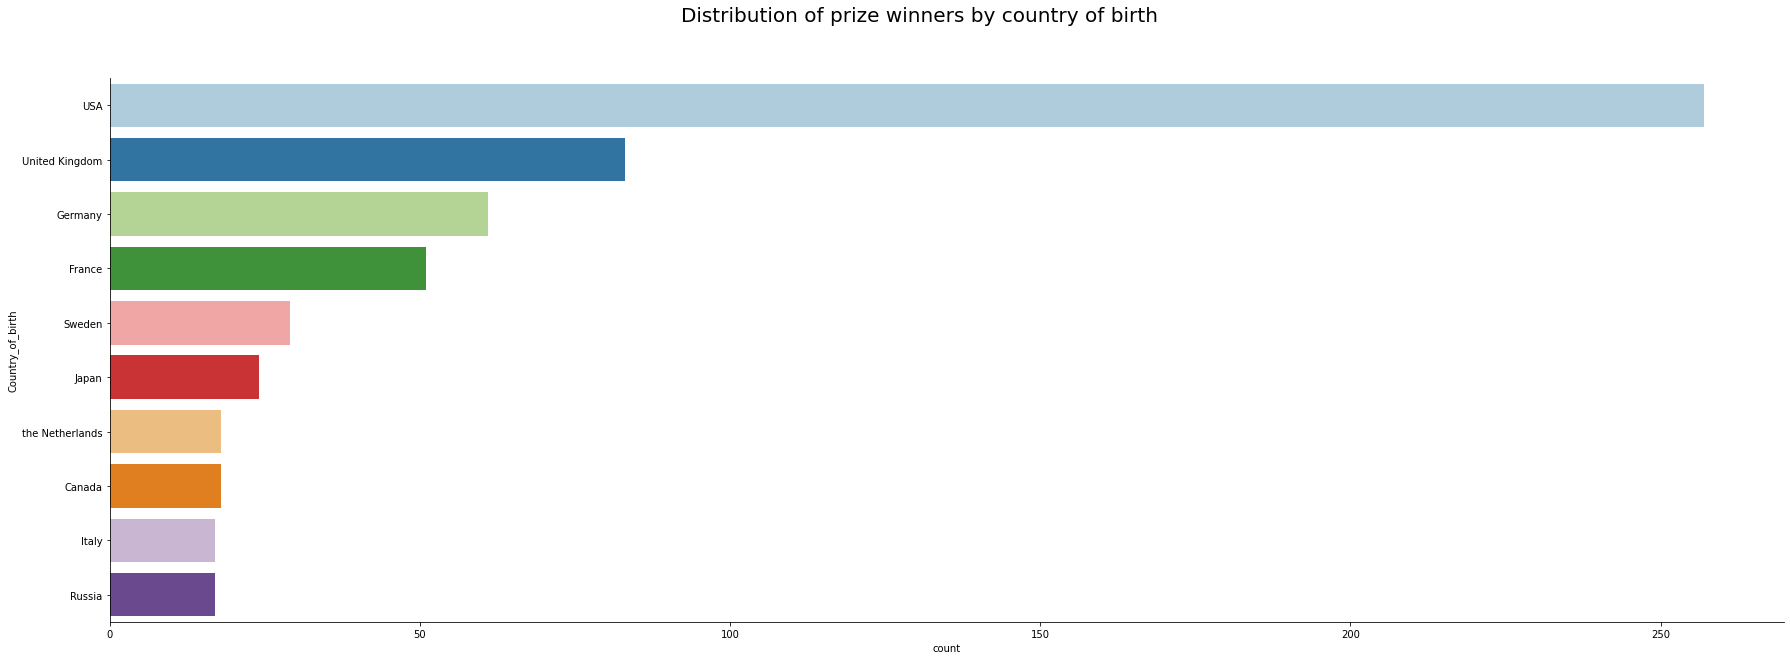

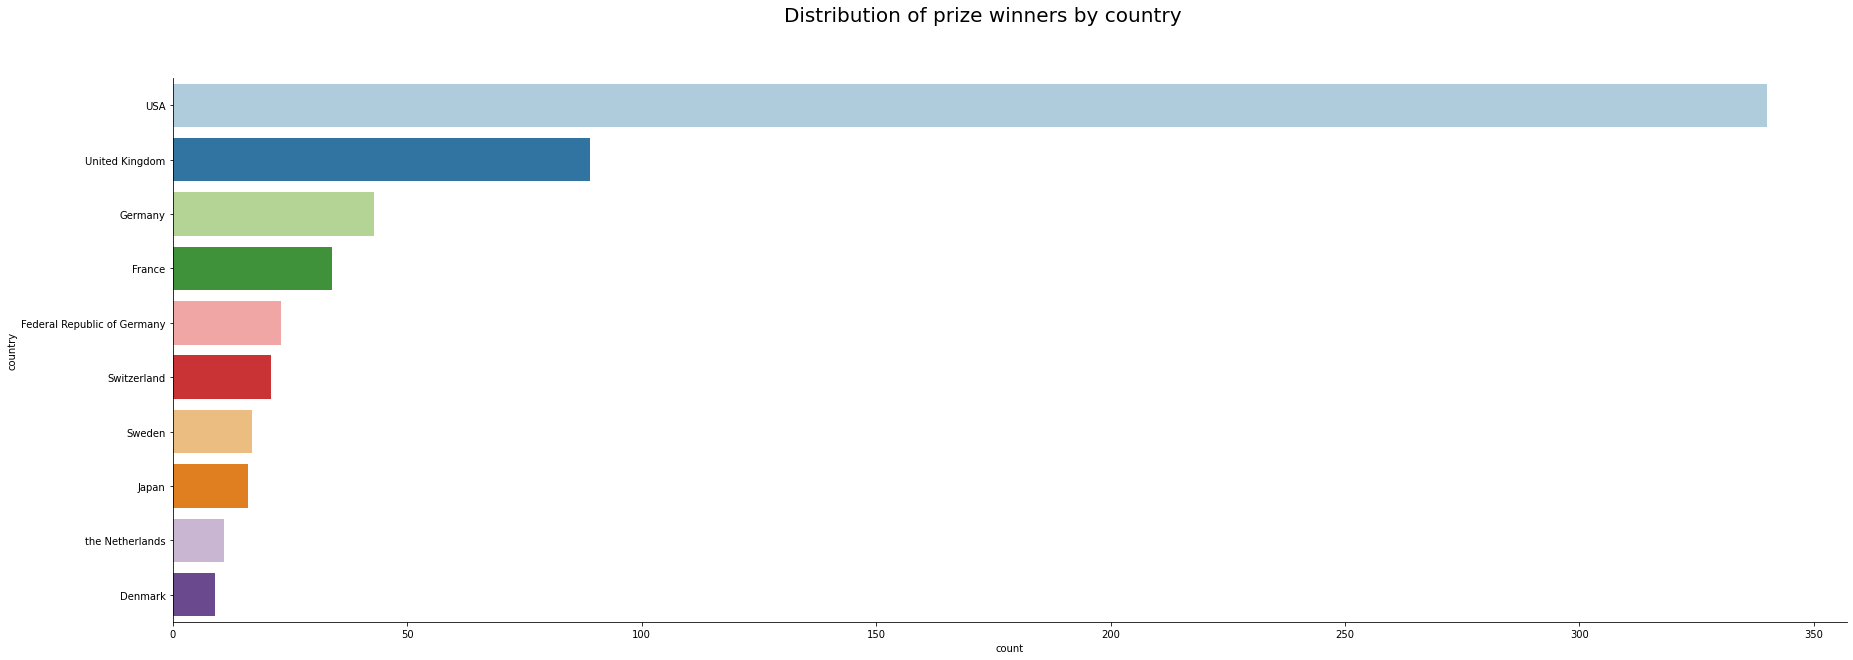

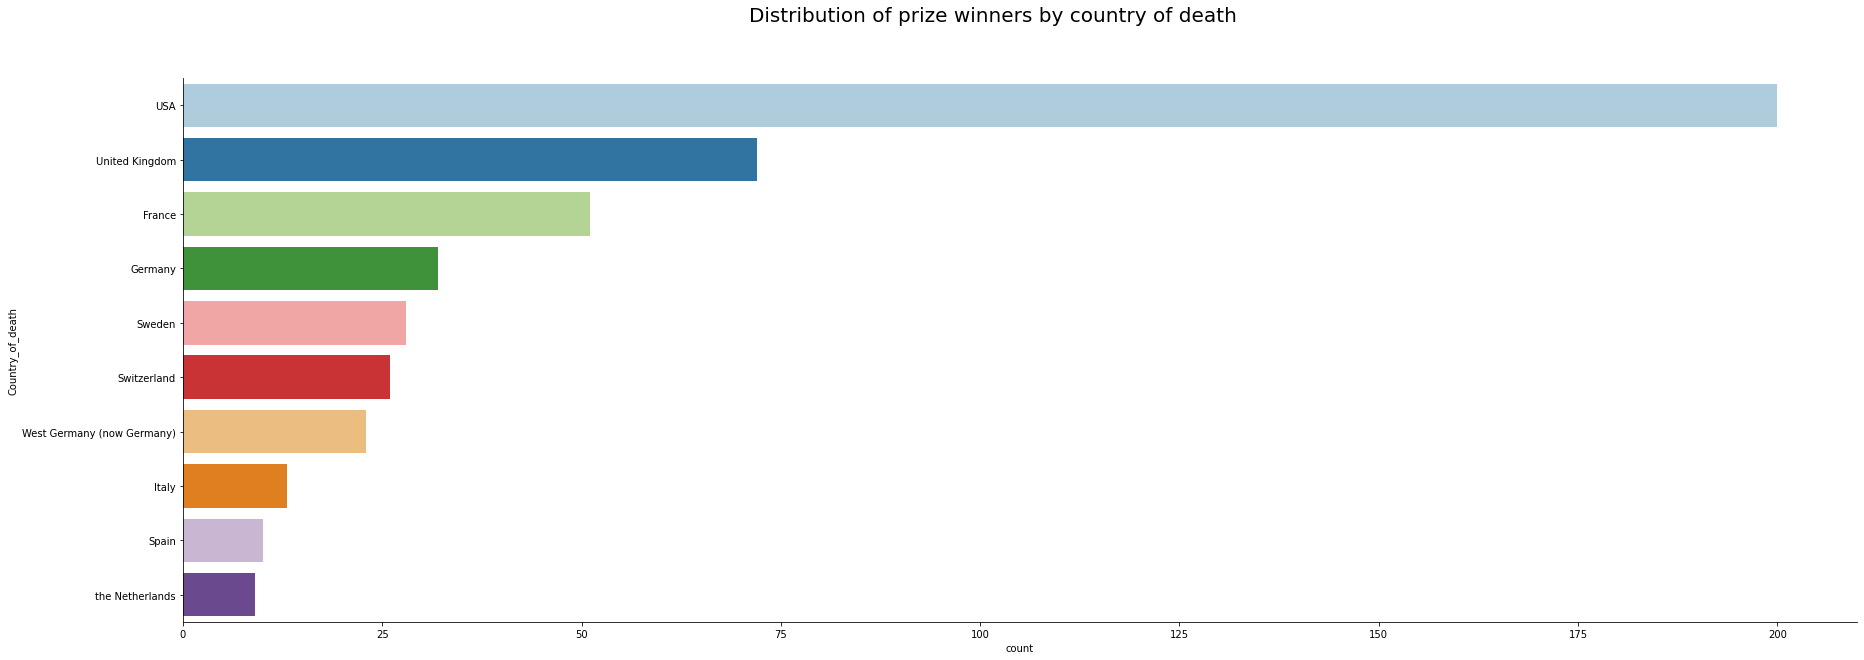

In [25]:
# draw graph

plt.figure(figsize= (30,10))
sns.countplot(y = "Country_of_birth", data = df,  order = df["Country_of_birth"].value_counts().head(10).index  , palette = "Paired")
plt.suptitle("Distribution of prize winners by country of birth", fontsize = 20)
sns.despine(top = True, right = True, left = False, bottom = False)
plt.show()

# draw graph

plt.figure(figsize= (30,10))
sns.countplot(y = "country", data = df,  order = df["country"].value_counts().head(10).index  , palette = "Paired")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.suptitle("Distribution of prize winners by country", fontsize = 20)
plt.show()

# draw graph
plt.figure(figsize= (30,10))
sns.countplot(y = "Country_of_death", data = df,  order = df["Country_of_death"].value_counts().head(10).index  , palette = "Paired")
plt.suptitle("Distribution of prize winners by country of death", fontsize = 20)
sns.despine(top = True, right = True, left = False, bottom = False)

plt.show()

USA dominates the ratings in all three graphs followed by United Kingdom, Germany and France. One assumption may say that these are the countries with bright individuals who can make landmark discoveries. However a more realistic assumption would be that the nature of these nations are such that they are more apt at providing the resources required for discoveries. For examples, the funding, education and freedoms to pursue such discoveries. For poorer nations, due to issues such as poverty, war or restrictive laws, which prevents individuals from individuals from achieving their maximum potential. 

# Average Age of winners 
A new column must be made to calculate the age of the winners. The data is fairly symmetrical with a skew() score between -0.5 and 0.5. Graphically the distribution is as follows: 

In [26]:
# calcuate skew
df["age"] = df["year"] - df["date_of_birth"].dt.year

df["age"].skew()

-0.03358652965359777

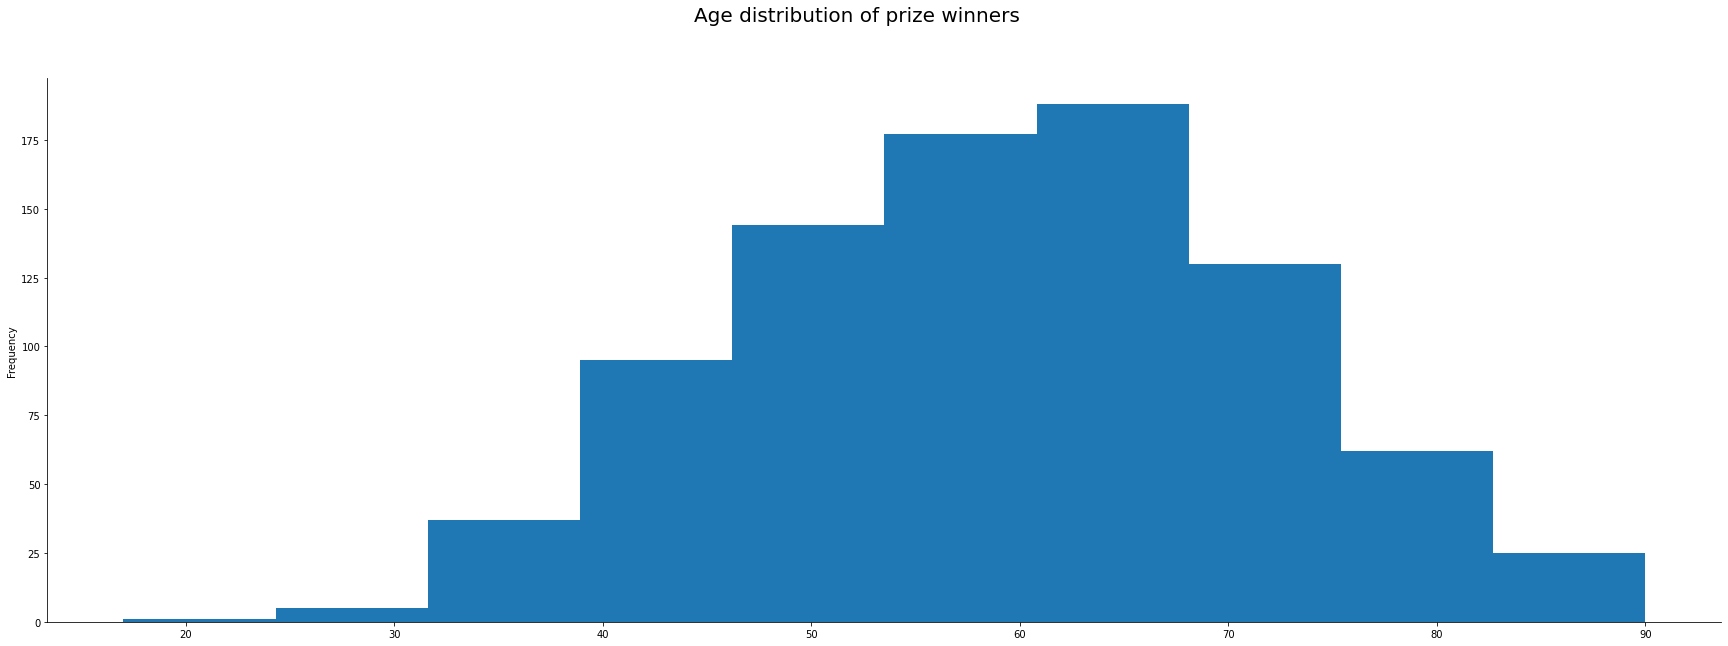

In [27]:
# draw graph
df["age"].plot(kind = "hist", bins = 10, figsize = (30,10),)
sns.despine(top = True, right = True, left = False, bottom = False)
plt.suptitle("Age distribution of prize winners", fontsize = 20)
plt.show()

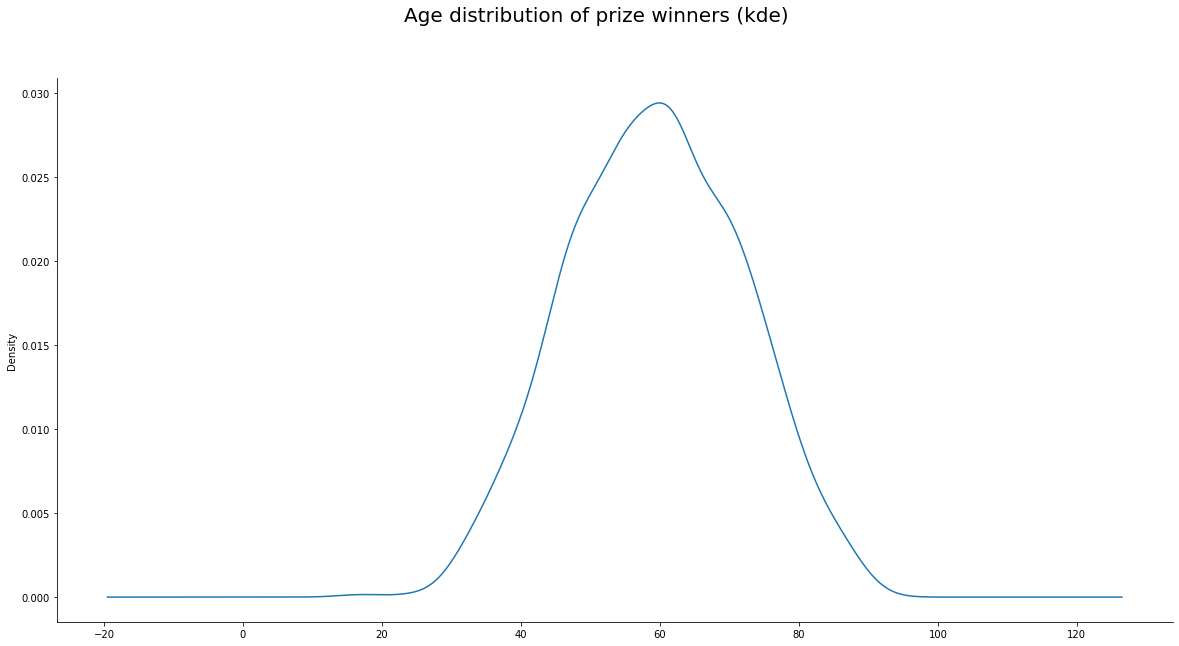

In [28]:
# draw graph
df["age"].plot(kind = "kde", figsize = (20,10))
sns.despine(top = True, right = True, left = False, bottom = False)
plt.suptitle("Age distribution of prize winners (kde)", fontsize = 20)
plt.show()

Investigating the data further highlights that the distribution varies depending on the category. The peace awards have the widest range of ages. However, in contrast, economics has a more concentrated age group cantered around 70. There are different reasons for this distribution including the academic nature of economics compared to peace and therefore how it is awarded. 

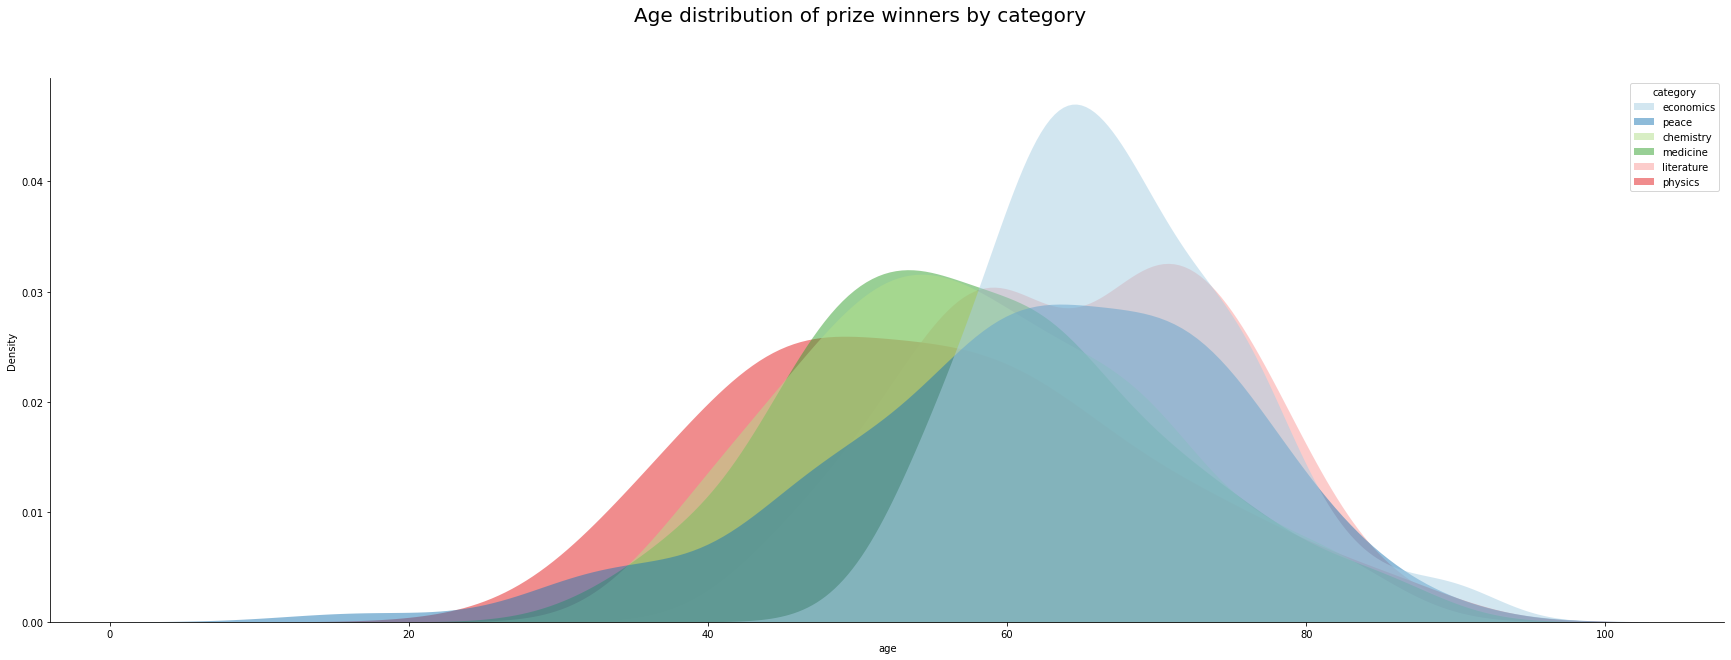

In [29]:
# draw graph
plt.figure(figsize= (30,10))
sns.kdeplot(
   data=df, x="age", hue="category",
   fill=True, common_norm=False, palette="Paired",
   alpha=.5, linewidth=0,
)
sns.despine(top = True, right = True, left = False, bottom = False)
plt.suptitle("Age distribution of prize winners by category", fontsize = 20)
plt.show()

# Conclusion 
This was a project examining the Nobel prize awards. As aspects of the project highlights whilst the data is insightful and can answer specific questions, wider research is required to understand the causes.

That said the Nobel prizes may wish to examine how they award the prizes and whether it could be more diverse without undermining the quality of the award. For example by examining a broader array of nominations.
 
# Author's notes
This was a simple and short project. However after watching a Rob Mulla's tutorial on EDA, I wanted to try some of his methods. 
For those interested in the tutorial, it can be found here: https://www.youtube.com/watch?v=xi0vhXFPegw&list=WL&index=43 